# Comparing different set of query results

In [44]:
import sqlite3 as lite
import common_functions_cache as c
import pickle
from sqlalchemy import create_engine
import pandas as pd

In [12]:
conn = lite.connect('cluster_db')

In [13]:
cursor = conn.cursor()

### Initial 300 query only high category and Peter not found

In [40]:
cursor.execute('select * from queries where query_id = 8')

In [41]:
cursor.fetchall()

[(8,
  '(ABSTRACT:"L-type calcium channel" OR ABSTRACT:"L-type Ca channel" OR ABSTRACT:"L-type calcium current" OR ABSTRACT:"L-type Ca2+ current" OR ABSTRACT:"L-type Ca current" OR ABSTRACT:"calcium channel, L-type" OR ABSTRACT:"ICa,L" OR ABSTRACT:"Cav1.2" OR ABSTRACT:"L-type Ca++ channel" OR ABSTRACT:"L-type Ca++ current" OR ABSTRACT:"DHPR" OR ABSTRACT:"Cav1.x" OR ABSTRACT:"DHP receptor" OR ABSTRACT:"DHP channel") AND (ABSTRACT:"IC50" OR ABSTRACT:"AC50" OR ABSTRACT:"XC50" OR ABSTRACT:"EC50")',
  293,
  '2015-9-14')]

In [14]:
high_category_list = [25596477,1706275,12005367,1701359,2550449,25057870,7693284,1645340,14645142,7828652,10877527,9565772,11743888,8287905,14597602,2536427,7693914,7616442,7957608,1380380,14718255,10482912,9200565,7996445,10212396,8485628,10051142,16086157,8794826,9788778,16524785,9151307,16445575,9151306,1658607,9405427,12396023,17023597,7791099,7881746,18829731,22975497,9242181,9098694,7957616,25179083,11332571,9360010,7723746,24508520,16302909,1347567,9709405,12165041,8371147,8799581,12674757,10482914,25535742,10333718,25016086,7520693,9776350,16157773,10440104,12966159,19378468,8897446,16173926,9146880,10651150,9421274,7751400,14623763,18092154,8842417,18362602,23396228,9593072,7897598,19634509,1709243,8341720,8897484,17519531,15881613,11953130,12624815,7760349,7711935,11392461,7475051,16308426,12605020,15243307,8821512,10511122,12548079,19809324,9639341,8709127,18310913,8897484,9876109]

In [15]:
Peter_found_pdf = [2550449, 25057870, 7693284, 1645340, 14645142, 11743888, 14597602, 1380380, 14718255, 10482912, 8485628, 10051142, 8794826, 9405427, 17023597, 7881746, 9242181, 8799581, 10482914, 25535742, 7520693, 9776350, 16157773, 12966159, 9146880, 9421274, 14623763, 8842417, 18362602, 9639341, 18310913]

In [37]:
high_not_found = list(set(high_category_list) - set(Peter_found_pdf))

In [38]:
len(high_not_found)

72

In [25]:
with open('terms_for_highlighting.pkl', 'rb') as f: 
    broader_terms = pickle.load(f)  

In [39]:
c.colour_terms(c.get_df(db_name = 'cluster_db', sql_condition = 'r.pmid in ({})'.format(str([int(i) for i in high_not_found]).strip("']'").split("[")[1]), query_id_list = [8])[0], markup_list = broader_terms)

,pmid,pmid_link,year,title,abstract,journal,inChEMBL,score,avail,pdf_links,other_links,campus_links,request_access,error_comment
1,25596477,25596477,2015,Synthesis and L-type calcium channel blocking activity of new chiral oxadiazolothiazinones.,"Oxadiazolo[3,4-c][1,4]thiazin-3-ones are cardiovascular agents that block L-type calcium channels. Previous data of cardiac and vasorelaxant activity on guinea-pig for several derivatives indicated the two positions ortho to the thiazine's sulphur as crucial for modulating the activity; but these positions are likely susceptible to metabolic biotransformations, as indicated by in silico predictions. We designed new derivatives, and obtained three negative inotropic agents with EC50 in the low nanomolar range, more potent than all the precursors published so far. In particular, benzocondensation at the thiazine ring led to 3a (EC50 = 0.013 μM) and 3b (EC50 = 0.006 μM). Besides negative inotropy, we also observed relaxant activity on nonvascular muscle in the micromolar range. We resolved the new derivatives by chiral chromatography, and determined their absolute configuration by comparing experimental and calculated chiroptical properties (VCD, ECD and ORD): they hold the same absolute configuration-optical rotation relationship, (S)-(+)/(R)-(-). Both cardiac and nonvascular activity are majorly or mostly retained in the R-form for all the compounds, but for the nonvascular activity we observed a strong stereoselectivity for 3a, with the R-form in the nanomolar range (IC50 = 0.020 μM) and 259-fold more potent than the S-one.",European journal of medicinal chemistry,0,9.88,S,,,campus_link_0,,
2,1706275,1706275,1990,"Ca2+ channel inhibition by a new dihydropyridine derivative, S11568, and its enantiomers S12967 and S12968.","Biochemical and electrophysiological techniques were used to describe the Ca2+ channel blocking properties of a new dihydropyridine derivative, S11568 (+/-)- ([(amino-2-ethoxy)-2-ethoxy]methyl)-2-(dichloro-2',3'-phenyl)-4- ethoxy-carbonyl-3-methoxycarbonyl-5-methyl-6-dihydro-1,4-pyridine and its enantiomers S12967 ((+)-S11568) and S12968 ((-)-S11568). In binding studies, S11568 and S12968 displaced specifically bound [3H]PN 200-110 from cardiac and vascular smooth muscle preparations with potencies of 5.6-51 nM, respectively. S12967 was 6- to 18-fold less potent than S12968. A good correlation was found between the IC50 value for the inhibition of 45Ca2+ uptake by A7r5 aortic smooth muscle cells and binding data. Whole-cell patch clamp studies in both guinea-pig ventricular myocytes and A7r5 cells yielded similar results. At holding potential (VH) -50 mV, S12968 inhibited L-type Ca2+ current with an IC50 value near 70 nM, 2- to 3-fold more potently than S11568 and 30-fold more potently than S12967. With VH -100 mV, all three compounds were less potent, with IC50 values ranging from 500 nM to 3 microM. These results demonstrate conclusively that S12968 is the more active enantiomer. Furthermore, the pronounced voltage dependence of its actions in vitro suggests that in vivo it could exhibit good selectivity for vascular smooth muscle over cardiac muscle.",European journal of pharmacology,0,6.99,S,,,campus_link_0,,
3,12005367,12005367,2002,Synthesis and spasmolytic action of 2-substituted thienopyrimidin-4-one derivatives.,"In the search for novel compounds to treat disorders of smooth muscle function, efforts have focused on some 2-substituted thieno[2,3-d]pyrimidin-4-one derivatives that show interesting spasmolytic action. Our laboratories have developed a new series of quaternary salts of 2-substituted thieno[2,3-d]pyrimidin-4-one and thieno[3,2-d]pyrimidin-4-one isomers with therapeutic potential. Thesesubstances were prepared starting from simple derivatives of thiophene. Their spasmolytic activity was evaluated on transmurally stimulated guinea-pig ileum. The most active compounds (IC50 1.12-2.71 microM) 7f-7h, 12d and 12f had the terminal piperidino nucleus in 

### Different queries in cluser_db

In [42]:
cursor.execute('select * from queries')

In [43]:
cursor.fetchall()

[(1,
  '(ABSTRACT:"calcium channel modulator" OR ABSTRACT:"calcium channel antagonist" OR ABSTRACT:"calcium channel block" OR ABSTRACT:"calcium channel inhibitor" OR ABSTRACT:"calcium channel affinity" OR ABSTRACT:"Ca2+ channel modulator" OR ABSTRACT:"Ca2+ channel antagonist" OR ABSTRACT:"Ca2+ channel block" OR ABSTRACT:"Ca2+ channel inhibitor" OR ABSTRACT:"Ca2+ channel affinity" OR ABSTRACT:"Ca(2+) channel modulator" OR ABSTRACT:"Ca(2+) channel antagonist" OR ABSTRACT:"Ca(2+) channel block" OR ABSTRACT:"Ca(2+) channel inhibitor" OR ABSTRACT:"Ca(2+) channel affinity" OR ABSTRACT:"Ca(2+)-channel-blocking" OR ABSTRACT:"Ca(2+)-channel block" OR ABSTRACT:"calcium antagonist" OR ABSTRACT:"calcium entry antagonist") AND (ABSTRACT:"IC50" OR ABSTRACT:"IC(50)" OR ABSTRACT:"inhibitory activity" OR ABSTRACT:"analogue" OR ABSTRACT:"ligand" OR ABSTRACT:"binding" OR ABSTRACT:"potency" OR ABSTRACT:"potencies" OR ABSTRACT:"displacement" OR ABSTRACT:"displacing" OR ABSTRACT:"inhibitory concentration" O

### ChEMBL pmids for LTCC

In [127]:
# Data that Francis selected for LTCC from ChEMBL
engine = create_engine(open('/Users/Ines/alchemy_ines_login.txt').read().strip())

sql = '''select * from TT_LTCC_CURVE_DATA a order by
    a.species
  , a.parent_cmpd_chemblid
  , a.active'''


data = pd.read_sql(sql, engine)

data.shape

(1317, 28)

In [52]:
pre_chembl_pmids = []
pre_chembl_pmids = list(data['pubmed_id'].unique())

In [53]:
pre_chembl_pmids[:10]

[8474099.0,
 1507200.0,
 nan,
 3339603.0,
 10447952.0,
 1311765.0,
 2435903.0,
 7837222.0,
 2840498.0,
 2142737.0]

In [54]:
pre_chembl_pmids.remove(pre_chembl_pmids[2]) # this was 'nan' removed here
chembl_pmids = []

for pmid in pre_chembl_pmids:
    chembl_pmids.append(pmid.astype(int))

In [88]:
#Number of articles contributing LTCC data in ChEMBL
len(set(pre_chembl_pmids))

81

In [77]:
chembl_pmids[:10]

[8474099,
 1507200,
 3339603,
 10447952,
 1311765,
 2435903,
 7837222,
 2840498,
 2142737,
 2329573]

### Mirams references (those that had pmid) # This is all references not just LTCC

In [58]:
Mirams_paper = [21300721]

In [56]:
#References for IC50 values in Table 1
Mirams_refs = [
    16308426
    , 15599706
    , 2176700
    , 2434173
    , 7532747
    , 17005919
    , 18048694
    , 10742304
    , 12130750
    , 2579237
    , 2571988
    , 7527502
    , 2050292
    , 19673885
    , 9374794
    , 11961040
    , 2434345
    , 12686762
    , 8709127
    , 10325236
    , 7629795
    , 8431994
    , 8996185
    , 15385083
    , 12644906
    , 11743888
    , 12007180
    , 15790762
    , 10769189
    , 9876109
    , 10924918
    , 7109844
    , 2426120
    , 3012067
    , 16843688
    , 1175271
    , 12176106
    , 10028924
    , 12966159
    , 15579009
    , 12667944
    , 15637086
]

In [57]:
len(Mirams_refs)

42

### Big query (30,000)

#### I have found that results of queries 2 and 5 are complementary, there is some overlap.

In [67]:
cursor.execute('select * from queries where query_id in (2,5)')
cursor.fetchall()

[(2,
  '(ABSTRACT:"calcium channel" OR ABSTRACT:"Ca channel" OR ABSTRACT:"Ca(2+) channel" OR ABSTRACT:"Ca(2+)-channel" OR ABSTRACT:"Ca2+ channel" OR ABSTRACT:"Ca2+ current" OR ABSTRACT:"calcium current" OR ABSTRACT:"Ca current" OR ABSTRACT:"Ca(2+) current" OR ABSTRACT:"Ca(2+)-current" OR ABSTRACT:"Ca++ channel" OR ABSTRACT:"Ca++ current" OR ABSTRACT:"LTCC" OR ABSTRACT:"Ca(V)1." OR ABSTRACT:"CaV1." OR ABSTRACT:"I(Ca)" OR ABSTRACT:"(ICa)" OR ABSTRACT:"ICa,L" OR ABSTRACT:"L-type") AND (ABSTRACT:"IC50" OR ABSTRACT:"IC(50)" OR ABSTRACT:"inhibitory activity" OR ABSTRACT:"analogue" OR ABSTRACT:"ligand" OR ABSTRACT:"potency" OR ABSTRACT:"potencies" OR ABSTRACT:"inhibitory concentration" OR ABSTRACT:"antagonist" OR ABSTRACT:"affinity" OR ABSTRACT:"EC50" OR ABSTRACT:"EC(50)")',
  16875,
  '2015-8-11'),
 (5,
  '(ABSTRACT:"calcium channel" OR ABSTRACT:"Ca channel" OR ABSTRACT:"Ca(2+) channel" OR ABSTRACT:"Ca(2+)-channel" OR ABSTRACT:"Ca2+ channel" OR ABSTRACT:"Ca2+ current" OR ABSTRACT:"calcium cu

In [60]:
#Here are the distinct ones:
cursor.execute('select distinct pmid from result_ids where query_id in (2,5)')
big_query_pmids = [i[0] for i in cursor.fetchall()]
len(big_query_pmids)

33957

In [64]:
#Not distinct:
cursor.execute('select pmid from result_ids where query_id in (2,5)')
len(cursor.fetchall())

43639

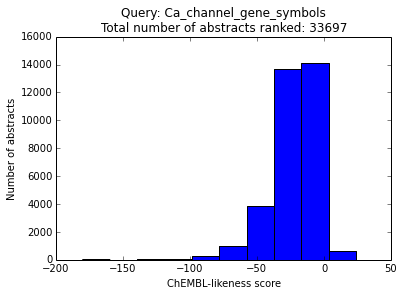

In [65]:
c.plot_scores([2,5], db_name = 'cluster_db')

### Comparing top articles from big query with high_category articles from initial 300 query

In [92]:
cursor.execute('select distinct r.pmid from result_ids r join scores s on r.pmid = s.pmid join article_data a on a.pmid = r.pmid where query_id in (2,5) and score > 0 and in_chembl = 0')
top_a_big_query = [i[0] for i in cursor.fetchall()]

In [93]:
len(top_a_big_query)

1101

In [94]:
len(set(high_category_list)&set(top_a_big_query))

11

Conclude: Only 11 overlapping there in top 1100 articles. Farily different set from the HIGH-ranked abstracts.

### Comparing ChEMBL LTCC refs with top big query

In [79]:
cursor.execute('select distinct r.pmid from result_ids r join scores s on r.pmid = s.pmid join article_data a on a.pmid = r.pmid where query_id in (2,5)')
top_b_big_query = [i[0] for i in cursor.fetchall()]
len(set(chembl_pmids)&set(top_b_big_query))

32

32/81 chembl references are in the articles from the big search. These are almost all in the top though (b/c of ChEMBL-likeness score :) at least that's working):

In [96]:
cursor.execute('select distinct r.pmid from result_ids r join scores s on r.pmid = s.pmid join article_data a on a.pmid = r.pmid where query_id in (2,5) and score > 0')
top_c_big_query = [i[0] for i in cursor.fetchall()]
len(set(chembl_pmids)&set(top_c_big_query))

29

In [97]:
len(top_c_big_query)

1299

### Comparing Mirams refs with top big query

In [81]:
Mirams_paper in top_a_big_query

False

Mirams paper is not in the top 1100 - low ChEMBL-likeness score:

In [83]:
cursor.execute('select * from scores where pmid = {}'.format(Mirams_paper[0]))
cursor.fetchall()

[(21300721, -17.29)]

In [84]:
cursor.execute('select distinct r.pmid from result_ids r join scores s on r.pmid = s.pmid join article_data a on a.pmid = r.pmid where query_id in (2,5) and score > -17.29')
len(cursor.fetchall())

15075

Mirams' paper has rank 15000 

In [85]:
cursor.execute('select distinct r.pmid from result_ids r join scores s on r.pmid = s.pmid join article_data a on a.pmid = r.pmid where query_id in (2,5) and score < -17.29')
len(cursor.fetchall())

18614

How many of its total 42 refs are found in the top?

In [86]:
len(set(Mirams_refs)&set(top_b_big_query))

17

# Some things out of interest

### Number or compounds per reference for ChEMBL LTCC references

In [126]:
data?

In [98]:
data.columns

Index(['target_chemblid', 'pref_name', 'target_type', 'organism', 'species', 'relationship_type', 'assay_chemblid', 'description', 'assay_organism', 'parent_cmpd_chemblid', 'cmpd_chemblid', 'standard_type', 'standard_relation', 'standard_value', 'standard_units', 'pchembl_value', 'activity_comment', 'data_validity_comment', 'potential_duplicate', 'compound_key', 'published_type', 'published_relation', 'published_value', 'published_units', 'doc_chemblid', 'pubmed_id', 'reference', 'active'], dtype='object')

In [121]:
data.head()

,target_chemblid,pref_name,target_type,organism,species,relationship_type,assay_chemblid,description,assay_organism,parent_cmpd_chemblid,...,potential_duplicate,compound_key,published_type,published_relation,published_value,published_units,doc_chemblid,pubmed_id,reference,active
0,CHEMBL1940,Voltage-gated L-type calcium channel alpha-1C subunit,SINGLE PROTEIN,Homo sapiens,Cat,H,CHEMBL656260,Inhibition of (-)-[3H]- D-888 binding to L-type calcium channels in kitten heart ventricle membranes,Felis catus,CHEMBL138302,...,NaN,2d,IC50,=,0.26,uM,CHEMBL1127038,1507200,"J. Med. Chem., v. 36, p. 439 (1993)",1
1,CHEMBL1940,Voltage-gated L-type calcium channel alpha-1C subunit,SINGLE PROTEIN,Homo sapiens,Cat,H,CHEMBL656260,Inhibition of (-)-[3H]- D-888 binding to L-type calcium channels in kitten heart ventricle membranes,Felis catus,CHEMBL138302,...,NaN,2a,IC50,=,0.39,uM,CHEMBL1127038,1507200,"J. Med. Chem., v. 36, p. 439 (1993)",1
2,CHEMBL1940,Voltage-gated L-type calcium channel alpha-1C subunit,SINGLE PROTEIN,Homo sapiens,Cat,H,CHEMBL656260,Inhibition of (-)-[3H]- D-888 binding to L-type calcium channels in kitten heart ventricle membranes,Felis catus,CHEMBL138302,...,NaN,2c,IC50,=,0.50,uM,CHEMBL1127038,1507200,"J. Med. Chem., v. 36, p. 439 (1993)",1
3,CHEMBL1940,Voltage-gated L-type calcium channel alpha-1C subunit,SINGLE PROTEIN,Homo sapiens,Cat,H,CHEMBL656260,Inhibition of (-)-[3H]- D-888 binding to L-type calcium channels in kitten heart ventricle membranes,Felis catus,CHEMBL138302,...,NaN,2b,IC50,=,0.27,uM,CHEMBL1127038,1507200,"J. Med. Chem., v. 36, p. 439 (1993)",1
4,CHEMBL1940,Voltage-gated L-type calcium channel alpha-1C subunit,SINGLE PROTEIN,Homo sapiens,Cat,H,CHEMBL656260,Inhibition of (-)-[3H]- D-888 binding to L-type calcium channels in kitten heart ventricle membranes,Felis catus,CHEMBL343771,...,NaN,7a,IC50,=,0.48,uM,CHEMBL1127038,1507200,"J. Med. Chem., v. 36, p. 439 (1993)",1


In [130]:
#Number of unique compound-pmid rows
len(data.loc[:,['cmpd_chemblid', 'pubmed_id']].drop_duplicates().dropna())

906

In [129]:
#Number of unique compounds (regardless of pmids)
len(data['cmpd_chemblid'].unique())

899

In [128]:
#Number of unique pmids
len(data['pubmed_id'].dropna().unique())

81

In [101]:
#Average number of compounds per article
899 / 82

10.963414634146341

In [131]:
data.loc[:,['pubmed_id', 'cmpd_chemblid']].drop_duplicates().dropna().head()

,pubmed_id,cmpd_chemblid
0,8474099,CHEMBL138302
4,8474099,CHEMBL343771
8,8474099,CHEMBL6966
9,1507200,CHEMBL29067
16,3339603,CHEMBL102498


In [157]:
hist_pmid_list = []
hist_freq_list = []

for pmid in data['pubmed_id'].dropna().unique():
    sel = len(data.loc[data['pubmed_id'] == pmid,'parent_cmpd_chemblid'].drop_duplicates())
    

    #data.query('pubmed_id == {}'.format(pmid))
    hist_pmid_list.append(pmid.astype(int))
    hist_freq_list.append(sel)

In [158]:
hist_pmid_list[:5]

[8474099, 1507200, 3339603, 10447952, 1311765]

In [159]:
hist_freq_list[:10]

[3, 1, 9, 8, 37, 2, 14, 10, 7, 8]

In [161]:
data.loc[data['pubmed_id'] == 8474099,'cmpd_chemblid'].drop_duplicates()

0    CHEMBL138302
4    CHEMBL343771
8      CHEMBL6966
Name: cmpd_chemblid, dtype: object

In [162]:
my_dict = {'NrCompounds': hist_freq_list, 'pmid': hist_pmid_list}

In [178]:
my_dict = {'NrCompounds': hist_freq_list, 'pmid': hist_pmid_list}
test_df = pd.DataFrame(data=my_dict)
test_df.loc[test_df['NrCompounds']>30,:]

,NrCompounds,pmid
4,37,1311765
43,69,20382537
45,37,23688558
48,90,23651412
49,33,8709127
57,33,8831775
58,35,7473567
67,39,9016337
73,87,2066997


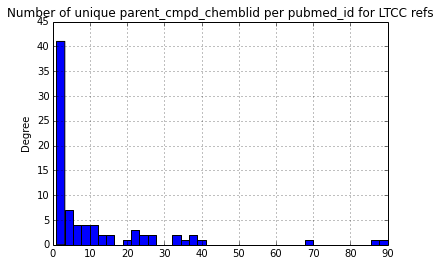

In [185]:
test_df['NrCompounds'].plot(kind = 'hist', bins = 40, title= 'Number of unique parent_cmpd_chemblid per pubmed_id for LTCC refs')
# Don't manage to add axis labels here but x axis = NrCompounds and y axis is frequency

### Peter's categories and ChEMBL-likeness score

Insert category into the df -- I noticed one HIGH article is missing in categories file? Not sure why but I don't think it affects the mean ChEMBL-id.

In [188]:
categories = pd.read_csv('categories_peter.txt', delimiter = '\t', encoding = 'ascii')
categories.index = range(1,len(categories) + 1)


In [261]:
categories.head()

,pmid,Of interest for follow-up,PH
1,25596477,HIGH,NaN
2,25681549,MED,NaN
3,1706275,HIGH,NaN
4,12005367,HIGH,NaN
5,1701359,HIGH,NaN


In [249]:
categories.loc[categories['pmid']==1314393,:]

,pmid,Of interest for follow-up,PH
284,1314393,MED,NaN


In [215]:
query_300_df = c.get_df(query_id_list = [8], db_name = 'cluster_db')[0]

In [217]:
query_300_df['pmid'].head()

1    25596477
2    11405285
3    18310913
4    25681549
5     1314393
Name: pmid, dtype: int64

In [252]:
def f(x):
    for i in categories.index:
        if x == categories.loc[i,'pmid']:
            return categories.loc[i,'Of interest for follow-up']
        else:
            continue

In [226]:
query_300_df['interest'] = query_300_df['pmid'].apply(f)

In [251]:
query_300_df.loc[query_300_df['pmid']==1314393,['pmid','interest']]

,pmid,interest
5,1314393,MED


In [254]:
len(query_300_df['pmid'].drop_duplicates())

293

In [260]:
len(categories['pmid'].drop_duplicates())

292

#### Peter's ranking correlates with ChEMBL-likeness score

In [253]:
grouped = query_300_df.groupby('interest')
grouped.mean()

,pmid,year,inChEMBL,score
interest,,,,
HIGH,11604411.165049,1999.864078,0.019417,-12.237353
LOW,10440733.573643,1998.612403,0.000000,-16.458915
MED,11486717.883333,1999.866667,0.000000,-14.746667
